In [1]:
import hepi
import smpl
import hepi.resummino as rs
import numpy as np
import matplotlib.pyplot as plt
rs.set_path("~/git/resummino_ug_to_UX_vNLO/")
print (rs.get_path())

~/git/resummino_ug_to_UX_vNLO/


[300.         343.33333333 386.66666667 430.         473.33333333
 516.66666667 560.         603.33333333 646.66666667 690.
 733.33333333 776.66666667 820.         863.33333333 906.66666667
 950.        ] [1.0+/-0.0011909734961118223 1.0+/-0.0011620139989432965
 1.0+/-0.0011358972150264574 1.0+/-0.0011121581779759179
 1.0+/-0.0010908309077865134 1.0+/-0.0010713361090606568
 1.0+/-0.0010536983409148628 1.0+/-0.001037999539279933
 1.0+/-0.0010237492200089182 1.0+/-0.0010104209745925579
 1.0+/-0.0009984729505103237 1.0+/-0.0009877995623753652
 1.0+/-0.0009779989836039848 1.0+/-0.0009690465731564314
 1.0+/-0.0009605128717120747 1.0+/-0.0009528525962903052]
[300.         343.33333333 386.66666667 430.         473.33333333
 516.66666667 560.         603.33333333 646.66666667 690.
 733.33333333 776.66666667 820.         863.33333333 906.66666667
 950.        ] [0.5759509780000001+/-0.0006630809071199955
 0.332705956+/-0.00036986239980648327
 0.20135763829999997+/-0.0002169235152533109
 0.1265

[300.         343.33333333 386.66666667 430.         473.33333333
 516.66666667 560.         603.33333333 646.66666667 690.
 733.33333333 776.66666667 820.         863.33333333 906.66666667
 950.        ] [1.0+/-0.001251381149873619 1.0+/-0.0012292718172523499
 1.0+/-0.0012091465284071391 1.0+/-0.0011911360646449612
 1.0+/-0.0011740930482193204 1.0+/-0.0011583728257617246
 1.0+/-0.0011439154370930804 1.0+/-0.001130313869832368
 1.0+/-0.001117498178570996 1.0+/-0.0011056296752434617
 1.0+/-0.0010945336407635362 1.0+/-0.0010841078218915554
 1.0+/-0.0010742040670258053 1.0+/-0.0010648138980859226
 1.0+/-0.0010559235051994065 1.0+/-0.001047434127063079]
[300.         343.33333333 386.66666667 430.         473.33333333
 516.66666667 560.         603.33333333 646.66666667 690.
 733.33333333 776.66666667 820.         863.33333333 906.66666667
 950.        ] [0.622117923+/-0.0007438760687745908
 0.35336963600000004+/-0.00040872675377623727
 0.210220573+/-0.00023640634801147916
 0.1298672977+/-

KeyboardInterrupt: 

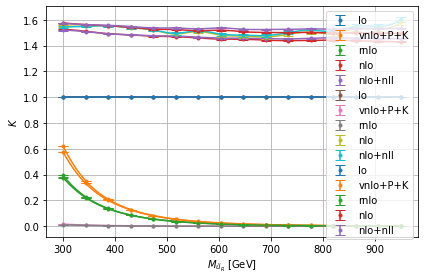

In [2]:
for lo_pdf,nlo_pdf in [("cteq6l1","cteq66")]:
    for p in [2000002,1000002]:
        i = hepi.Input(hepi.Order.NLO_PLUS_NLL,7000,p,1000022,"sps1a1000.in",lo_pdf,nlo_pdf,1., 1.)
        li = hepi.mass_scan([i],p, np.linspace(300,950,16),diff_L_R=20)
        dll = rs.run(li,False,False)
        #hepi.mass_plot(dll,p,"lo",yscale=1000,yaxis="$\sigma$ [fb]")
        #hepi.mass_plot(dll,p,"vnlo",yscale=1000,yaxis="$\sigma$ [fb]")
        #hepi.mass_vplot(dll,p,(dll["vnlo"]+dll["p_plus_k"]),yscale=1000,logy=True,yaxis="$\sigma$ [fb]",label="vlno+P+K")
        
        #hepi.mass_plot(dll,p,"rnlo",yscale=1000,yaxis="$\sigma$ [fb]")
        #hepi.mass_plot(dll,p,"p_plus_k",yscale=1000,yaxis="$\sigma$ [fb]")
        #hepi.mass_plot(dll,p,"nlo",yscale=1000,yaxis="$\sigma$ [fb]")
        #hepi.mass_plot(dll,p,"nlo_plus_nll",yscale=1000,yaxis="$\sigma$ [fb]",label="nlo+nll")
        
        #plt.savefig("comp_" + pdf + "_" + str(p) + ".pdf")
        #smpl.plot.show()
        #print(dll["K_lo"])
        hepi.mass_plot(dll,"lo",p,K=True,logy=False,label="lo")
        hepi.mass_vplot(dll,((dll["vnlo"]+dll["p_plus_k"]+dll["lo"])),p,K=True,logy=False,label="vnlo+P+K")
        #hepi.mass_vplot(dll,p,((dll["vnlo"]+dll["lo"])/dll["lo"]),logy=False,label="$K_\\mathrm{vnlo}$")
        hepi.mass_vplot(dll,((dll["rnlo"]+dll["lo"])),p,K=True,logy=False,label="rnlo")

        hepi.mass_plot(dll,"nlo",p,K=True,logy=False,yaxis="$K_\\mathrm{nlo}$",label="nlo")
        hepi.mass_plot(dll,"nlo_plus_nll",p,K=True,logy=False,yaxis="$K$",label="nlo+nll")
        
        #plt.savefig("K_comp_" + pdf + "_" + str(p) + ".pdf")
        #smpl.plot.show()

        #print(pdf, p, "done" )
    
 

In [ ]:
for run_plot in [True]:
    for scenario in ["sps1a1000_mod.in"]:
        for lo_pdf,nlo_pdf in [("cteq66","cteq66")]:
            for p in [2000002]:
                li = [hepi.Input(hepi.Order.NLO_PLUS_NLL, 7000, p, 1000022, scenario, lo_pdf, nlo_pdf, 1., 1.,precision=0.001,max_iters=50)]

                #li = hepi.scan(li,"mu_f",np.logspace(np.log10(1/10.), np.log10(10), 4))
                #li = hepi.scan(li,"mu_r",np.logspace(np.log10(1/10.), np.log10(10), 4))
                li = hepi.scale_scan(li,5,10.)
                #li = hepi.pdf_scan(li)

                dl = rs.run(li, False, False, run_plot,True)

                if not run_plot:
                    #dl = hepi.pdf_error(li,dl)
                    hepi.scale_plot(dl,["lo","nlo","nlo_plus_nll"],seven_point_band=True)
                    plt.savefig(input.get_output_dir() +"scale_variation2_" + str(p) + "_" + str(nlo_pdf) + "_" + str(scenario) + ".pdf")
